# Python Tutorial on 2D Deep Leraning Models for  Flower Classification using DL  Library
* In this tutorial, we will take a quick look on how to use TensorFlow. We are following the steps given below:

1. Import the necessary libraries and dataset
2. Prepare data for processing
3. Create the model: Part-1. without API, Part-2: with API,   Part-3: Transfer learning
4. Compile and Training the model
5. Visualization of training accuarcy and loss
6. Model evaluation and prediction
8. Performance evaluation of the model

* https://www.tensorflow.org/hub/tutorials/image_feature_vector

# Step-1.Import necessary libraries

1.1. Importing Library Packages\
The packages imported here are NumPy, cv2, train_test_split, ImageDataGenerator, regularizers, initializers and Matplotlib. train_test_split is a function in Sklearn for splitting data arrays into two subsets. Image data augmentation is supported in the Keras deep learning library using the ImageDataGenerator. Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting. Matplotlib is used here to read and display the images.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import *
import cv2
import numpy as np
import random
import os
import pandas as pd
import warnings

C:\Users\NITK\anaconda3\envs\Shyam_Lal\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


# Step-2: Loading  and Prepararing  Flower Dataset  

## Flower Image Dataset  of chamomile, tulip, rose, sunflower, dandelion.
* Dataset (flower Images): This dataset contains 4242 images of flowers.
* The data collection is based on the data flicr, google images, yandex images.
* You can use this datastet to recognize plants from the photo.
* The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
*  For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

* Acknowledgements: The data collection is based on scraped data from flickr, google images, and yandex images.
* Source of dataset:https://www.kaggle.com/code/ozdemirh/flower-recognition-with-transfer-learning-and-svm/data


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


# 2(a)Plotting some images

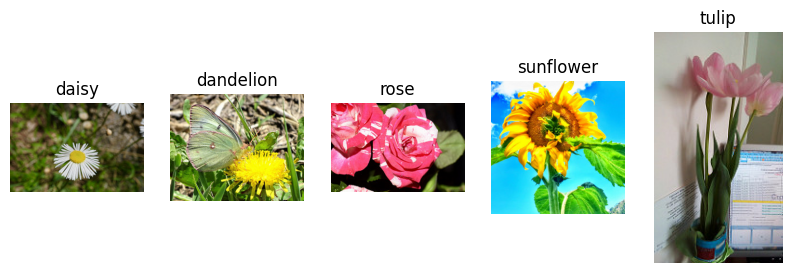

In [ ]:
daisy= plt.imread("/content/drive/MyDrive/flowers/daisy/34727863665_b00ac77266_n.jpg")
dandelion = plt.imread("/content/drive/MyDrive/flowers/dandelion/34725992285_21cb05733a_n.jpg")
rose= plt.imread("/content/drive/MyDrive/flowers/rose/33568345265_e4f7d0fe45_n.jpg")
sunflower = plt.imread("/content/drive/MyDrive/flowers/sunflower/34695605616_3b05bb1ef5_n.jpg")
tulip = plt.imread("/content/drive/MyDrive/flowers/tulip/32465197894_71dde519ae_n.jpg")
plt.figure(figsize=(10,3))
plt.subplot(1,5,1)
plt.imshow(daisy)
plt.title("daisy")
plt.axis('off')
plt.subplot(1,5,2)
plt.imshow(dandelion)
plt.title("dandelion")
plt.axis('off')
plt.subplot(1,5,3)
plt.imshow(rose)
plt.title("rose")
plt.axis('off')
plt.subplot(1,5,4)
plt.imshow(sunflower)
plt.title("sunflower")
plt.axis('off')
plt.subplot(1,5,5)
plt.imshow(tulip)
plt.title("tulip")
plt.axis('off')
plt.show()

 # Image Generator using  Tensorflow 2.7:

In [2]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                            horizontal_flip=True,
                            vertical_flip=True,
                            rescale=1./255,
                            validation_split=0.3)

 # Training Image Generator:

In [7]:
data_dir =r"D:\SujanD datasets\Cancer cells\train"#train data

train_generator = img_generator.flow_from_directory(directory=data_dir, target_size=(224, 224), batch_size=16, shuffle=True,subset="training")
print("Trainging classes")
print(train_generator.class_indices)
print("Trainging Labels")
print(train_generator.labels)

Found 4664 images belonging to 4 classes.
Trainging classes
{'A': 0, 'B': 1, 'C': 2, 'D': 3}
Trainging Labels
[0 0 0 ... 3 3 3]


# Test Image Generator:

In [13]:
test_generator = img_generator.flow_from_directory(directory=r"D:\SujanD datasets\Cancer cells\test",target_size=(224, 224), batch_size=16, shuffle=True, subset="validation")

print(test_generator.class_indices)
print(test_generator.labels)

Found 385 images belonging to 4 classes.
{'A': 0, 'B': 1, 'C': 2, 'D': 3}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


#Step 3. Creating Deep Learning Arechitecture (Part-1): 2D VGG16   Architecture without APIs



In [15]:
def VGG16():

  input = tf.keras.layers.Input(shape=(224, 224, 3))

  conv1 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(input)
  conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
  pool1 = tf.keras.layers.MaxPooling2D((2, 2), (2,2))(conv2)
  conv3 = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
  conv4 = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
  pool2 = tf.keras.layers.MaxPooling2D((2, 2), (2,2))(conv4)
  conv5 = tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
  conv6 = tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
  conv7 = tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv6)
  pool3 = tf.keras.layers.MaxPooling2D((2, 2), (2,2))(conv7)
  conv8 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
  conv9 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv8)
  conv10 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
  pool4 = tf.keras.layers.MaxPooling2D((2, 2), (2,2))(conv10)
  conv11 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
  conv12 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv11)
  conv13 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv12)
  pool5 = tf.keras.layers.MaxPooling2D((2, 2), (2,2))(conv13)
  global_pool = tf.keras.layers.GlobalAveragePooling2D()( pool5)
  dense1 = tf.keras.layers.Dense(2048, activation='relu')(global_pool)
  dense2 = tf.keras.layers.Dense(2048, activation='relu')(dense1)
  output = tf.keras.layers.Dense(4, activation='softmax')(dense2)

  model = tf.keras.models.Model(inputs=input, outputs=output)
  return model
vgg16model= VGG16()
# vgg16model.compile(optimizer ='Adam' , loss = 'categorical_crossentropy' , metrics = ["acc"])
vgg16model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 56, 128)       0   

#Step-4. Model Training

Callbacks is used to periodically save our model to disk, we can early stop the training process and get a view on internal statistics of a model during training. fit_generator function first accepts a batch of the dataset, then performs backpropagation on it, and then updates the weights in our model. Here we are restoring the model parameter, which allows to export a model so it can be used without further training to the original Python code.


In [16]:
# Compile the model
opt = Adam(0.0001)
vgg16model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=["accuracy"])
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',mode='min',factor=0.5,patience=5,verbose=1,cooldown=1,min_delta=0.0001)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1,mode = 'min', restore_best_weights = True)
check_path = '/content/drive/MyDrive/fccc.weights.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(check_path,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=True,mode='min')

#fitting the model
hist_scratch =vgg16model.fit(train_generator,validation_data= test_generator, epochs=30, verbose=1, callbacks=[reduce_lr,early_stop,checkpoint])

Epoch 1/30
292/292 [==============================] - 69s 225ms/step - loss: 1.1053 - accuracy: 0.5032 - val_loss: 1.3120 - val_accuracy: 0.4597

Epoch 00001: val_loss improved from inf to 1.31201, saving model to /content/drive/MyDrive\fccc.weights.h5
Epoch 2/30
292/292 [==============================] - 46s 158ms/step - loss: 0.9241 - accuracy: 0.5868 - val_loss: 1.3794 - val_accuracy: 0.4727

Epoch 00002: val_loss did not improve from 1.31201
Epoch 3/30
292/292 [==============================] - 47s 159ms/step - loss: 0.8767 - accuracy: 0.6087 - val_loss: 1.5442 - val_accuracy: 0.3792

Epoch 00003: val_loss did not improve from 1.31201
Epoch 4/30
292/292 [==============================] - 47s 160ms/step - loss: 0.7798 - accuracy: 0.6591 - val_loss: 0.9625 - val_accuracy: 0.6416

Epoch 00004: val_loss improved from 1.31201 to 0.96246, saving model to /content/drive/MyDrive\fccc.weights.h5
Epoch 5/30
292/292 [==============================] - 47s 160ms/step - loss: 0.7257 - accuracy: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


Text(0, 0.5, 'Loss')

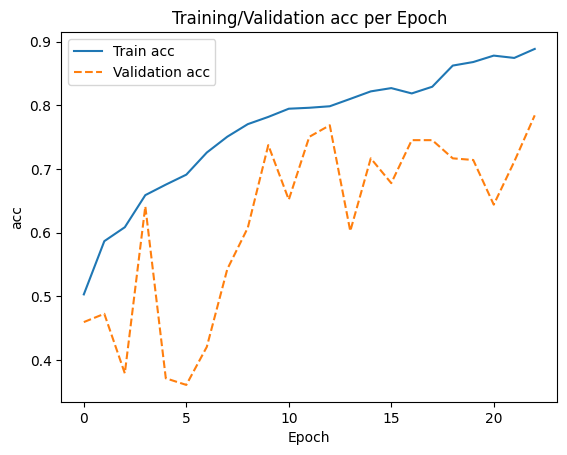

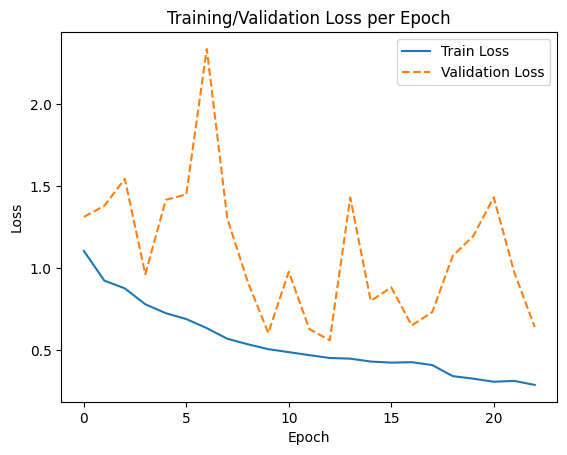

In [17]:
# Plot the model accuracy on training and validation data
print(hist_scratch.history.keys())

import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot(hist_scratch.history['accuracy'])
ax.plot(hist_scratch.history['val_accuracy'], '--')
ax.legend(['Train acc', 'Validation acc'])
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

# Plot the model loss on training and validation data
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot(hist_scratch.history['loss'], )
ax.plot(hist_scratch.history['val_loss'], '--')
ax.legend(['Train Loss', 'Validation Loss'])
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [ ]:
vgg16model.load_weights("/content/drive/MyDrive/flower.weights.h5")

In [18]:
# vgg16model.load_weights("./cropModel.h5")
class_labels = test_generator.class_indices
oriningal_test_classes = test_generator.labels
print(class_labels)
print("Original test classes")
print(oriningal_test_classes)

Y_pred =vgg16model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print("Predicted test classes")
print(y_pred)

{'A': 0, 'B': 1, 'C': 2, 'D': 3}
Original test classes
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Predicted test classes
[3 2 3 2 0 1 3 0 2 3 0 3 2 1 3 3 1 2 1 3 3 1 2 2 1 2 2 0 3 0 1 2 2 3 1 0 0
 2 3 2 1 3 0 1 1 2 2 1 0 1 0 0 3 1 2 3 1 0 0 3 2 3 2 3 1 0 3 2 3 

#Step8. Performance Evaluation

In [19]:
print('Accuracy {}'.format(accuracy_score(y_true=test_generator.labels, y_pred=y_pred)))
print('F1 {}'.format(f1_score(y_true=test_generator.labels, y_pred=y_pred,average = "macro")))
print('precision {}'.format(precision_score(y_true=test_generator.labels, y_pred=y_pred,average = "macro")))
print('recall {}'.format(recall_score(y_true=test_generator.labels, y_pred=y_pred,average = "macro")))

print('jaccard {}'.format(jaccard_score(y_true=test_generator.labels, y_pred=y_pred,average = "macro")))
print('classification_report\n {}'.format(classification_report(y_true=test_generator.labels, y_pred=y_pred)))
print('\n\n')
cm = confusion_matrix(y_true=test_generator.labels, y_pred=y_pred)
print(cm)

Accuracy 0.24415584415584415
F1 0.2205419918834553
precision 0.2224534154581042
recall 0.22076605241081085
jaccard 0.1269745642721636
classification_report
               precision    recall  f1-score   support

           0       0.29      0.24      0.26       139
           1       0.23      0.25      0.24        69
           2       0.31      0.33      0.32       123
           3       0.06      0.07      0.07        54

    accuracy                           0.24       385
   macro avg       0.22      0.22      0.22       385
weighted avg       0.25      0.24      0.25       385




[[33 28 45 33]
 [13 17 24 15]
 [46 20 40 17]
 [21  9 20  4]]


In [20]:
tf.keras.applications.resnet50

<module 'tensorflow.keras.applications.resnet50' from 'C:\\Users\\NITK\\anaconda3\\envs\\Shyam_Lal\\lib\\site-packages\\tensorflow\\keras\\applications\\resnet50\\__init__.py'>